# Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка датасета

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Создание DataFrame для удобства

In [3]:
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = [target_names[i] for i in y]

# Первый взгляд на данные

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

# Визуализация распределения признаков

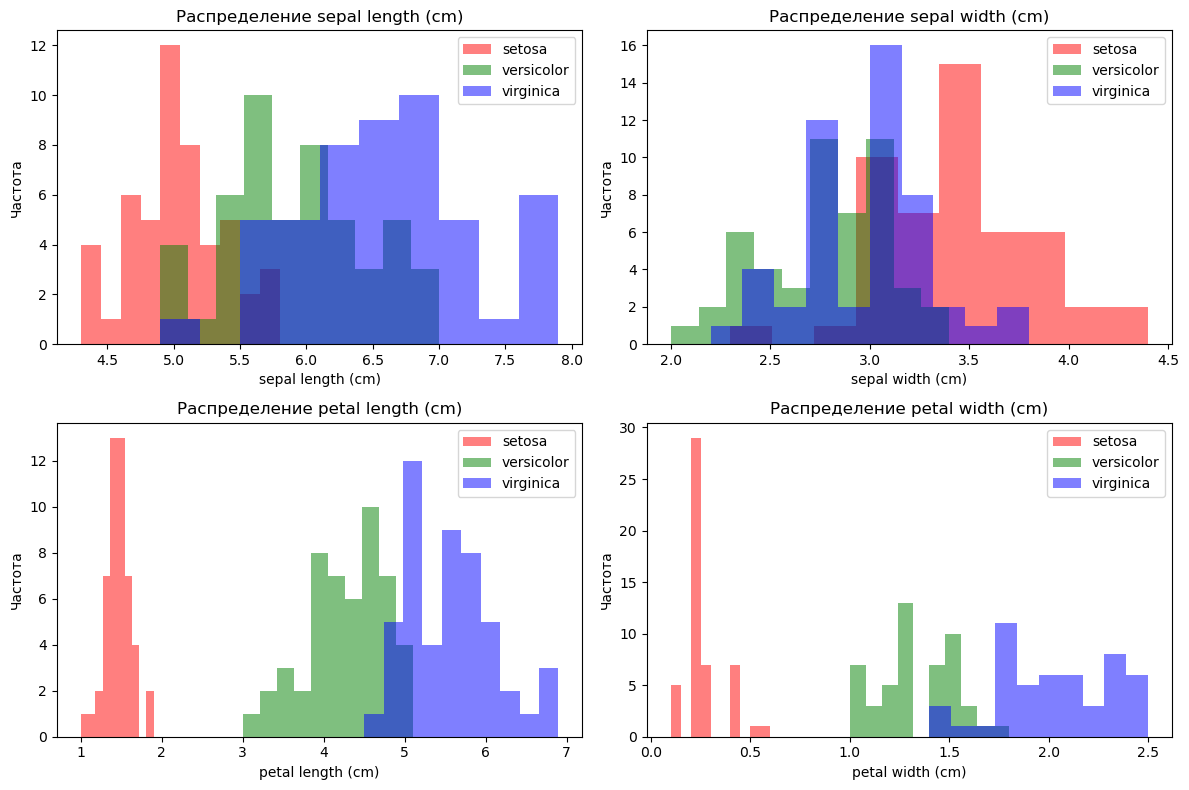

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = feature_names
colors = ['red', 'green', 'blue']

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    for target in range(3):
        axes[row, col].hist(df[df['species'] == target][feature], 
                          alpha=0.5, label=target_names[target], color=colors[target])
    axes[row, col].set_title(f'Распределение {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Частота')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

# Матрица корреляций

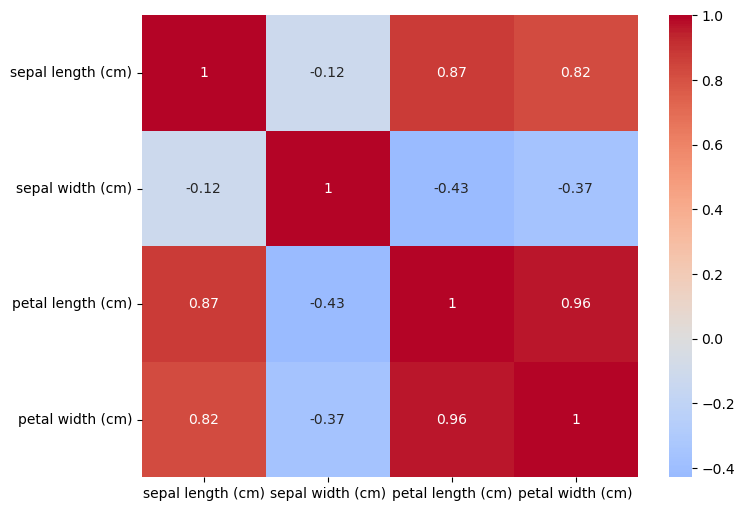

In [8]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

# Pairplot для визуализации взаимосвязей

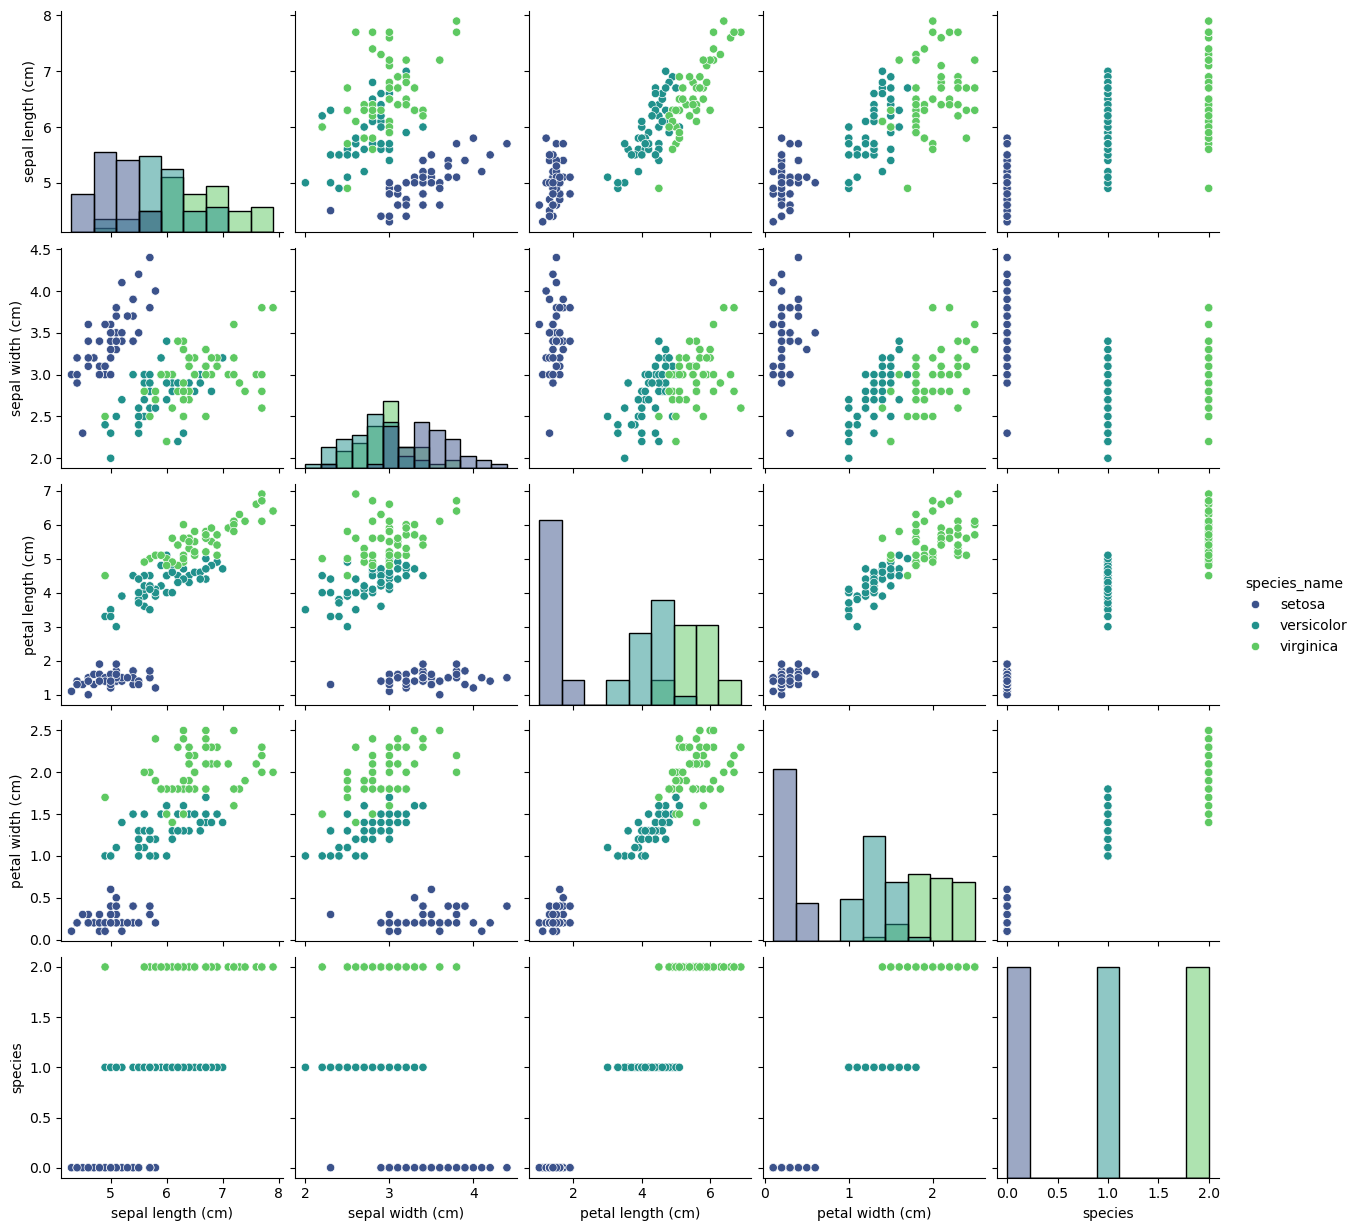

In [9]:
sns.pairplot(df, hue='species_name', diag_kind='hist', palette='viridis')
plt.show()

# Подготовка данных для обучения

In [10]:
X = df[features].values
y = df['species'].values

# Разделение на тренировочную и тестовую выборки

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Масштабирование признаков

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер тренировочной выборки: (105, 4)
Размер тестовой выборки: (45, 4)


# 1. Наивный байесовский классификатор (GaussianNB)/

In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print(f"Точность: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb, target_names=target_names))

Точность: 0.9111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



# 2. Многослойный перцептрон (MLP - нейронная сеть)

In [16]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50))
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print(f"Точность: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(classification_report(y_test, y_pred_mlp, target_names=target_names))

Точность: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# 3. Метод стохастического градиентного спуска (SGDClassifier)

In [17]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

print(f"Точность: {accuracy_score(y_test, y_pred_sgd):.4f}")
print(classification_report(y_test, y_pred_sgd, target_names=target_names))

Точность: 0.8000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.62      1.00      0.77        15
   virginica       1.00      0.40      0.57        15

    accuracy                           0.80        45
   macro avg       0.88      0.80      0.78        45
weighted avg       0.88      0.80      0.78        45



# 4. AdaBoost (Адаптивный бустинг)

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42, n_estimators=100)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print(f"Точность: {accuracy_score(y_test, y_pred_ada):.4f}")
print(classification_report(y_test, y_pred_ada, target_names=target_names))

Точность: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# 5. Quadratic Discriminant Analysis (Квадратичный дискриминантный анализ)


In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

print(f"Точность: {accuracy_score(y_test, y_pred_qda):.4f}")
print(classification_report(y_test, y_pred_qda, target_names=target_names))

Точность: 0.9778
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Сравнение точности всех 5 моделей из Scikit-learn

In [20]:
sklearn_models = ['Naive Bayes', 'MLP', 'SGD', 'AdaBoost', 'QDA']
sklearn_predictions = [y_pred_nb, y_pred_mlp, y_pred_sgd, y_pred_ada, y_pred_qda]

sklearn_accuracies = [accuracy_score(y_test, pred) for pred in sklearn_predictions]



# Создание DataFrame для сравнения


In [21]:
sklearn_comparison_df = pd.DataFrame({
    'Модель': sklearn_models,
    'Точность': sklearn_accuracies
}).sort_values('Точность', ascending=False)

print("Сравнение точности моделей:")
print(sklearn_comparison_df)

Сравнение точности моделей:
        Модель  Точность
4          QDA  0.977778
3     AdaBoost  0.933333
1          MLP  0.933333
0  Naive Bayes  0.911111
2          SGD  0.800000
